# Is Fandango Still Inflating Ratings?    


Following the work from Walt Hickey that analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased, this project will analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


### The main goal is to find about Fandango ratings distribution 

To compare, we will use 2 datasets from different times:

- Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


hickey = pd.read_csv('fandango_score_comparison.csv')
recent = pd.read_csv('movie_ratings_16_17.csv')

print(hickey.head())

print(recent.head())

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

We'll isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use

In [2]:
hickey_reduced = hickey[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

recent_reduced = recent[['movie', 'year', 'fandango']]

The file 'fandango_score_comparison.csv' contains every film from part of 2015 that has at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015. I believe the sampling of these movies is truly not random.

The file 'movie_ratings_16_17.csv' contains movie ratings data for 214 of the most popular movies released in 2016 and 2017.

Since we are told that the selection of movies from 2016 and 2017 were the 'most popular movies', I would say that doesn't represent a true random sample selected from the total population available.

So, we'll change slightly the current goal of our analysis such that:

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## New Goal: Compare Fandando ratings of 2015 and 2016 popular movies and determine is there is any difference 

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings. However, Fandango does not offers anymore the number of ratings, so we will use Rotten Tomatoes as a proxy, and discover if they have more than 30 ratings, finding that 9 out of 10 pass the test, so we will consider it is representative for our purposes. 

In [3]:
recent_reduced.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


So, we'll proceed to separate films only for 2015 and only for 2016 from each data set.
For the 2015 data the year is in the film name column, so will have to extract this to a seperate column.

In [4]:
New = pd.Series(hickey_reduced['FILM'].str[-6:-1].str.replace('(', ''), index=hickey_reduced.index)

hickey_reduced=hickey_reduced.assign(Year=New.values)

In [5]:
hickey_2015 = hickey_reduced[hickey_reduced['Year'] == '2015']

In [6]:
recent_2016 = recent_reduced[recent_reduced['year'] == 2016]

We'll generate two kernel density plots on the same figure for the distribution of movie ratings of each sample

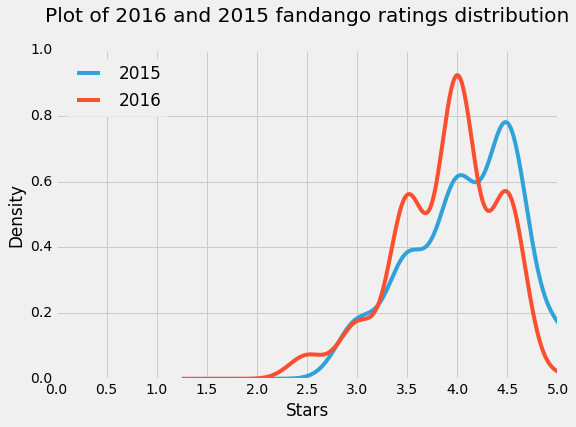

In [7]:
plt.style.use('fivethirtyeight')

hickey_2015['Fandango_Stars'].plot.kde(label='2015',legend=True, figsize=(8,5.5))
recent_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title('Plot of 2016 and 2015 fandango ratings distribution', y=1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks ([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()  

- Both distributions are strongly skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The skew suggests that movies on Fandango are given mostly high and very high fan ratings. 

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

We'll now examine the frequency distribution tables of the two distributions

In [8]:
print('2015' + '\n' + '-' * 16)
hickey_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [9]:
print('2016' + '\n' + '-' * 16)
recent_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

n 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. 

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

Now we'll take a couple of statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [10]:
mean_2015 = hickey_2015['Fandango_Stars'].mean()
mean_2016 = recent_2016['fandango'].mean()

median_2015 = hickey_2015['Fandango_Stars'].median()
median_2016 = recent_2016['fandango'].median()

mode_2015 = hickey_2015['Fandango_Stars'].mode()[0]
mode_2016 = recent_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


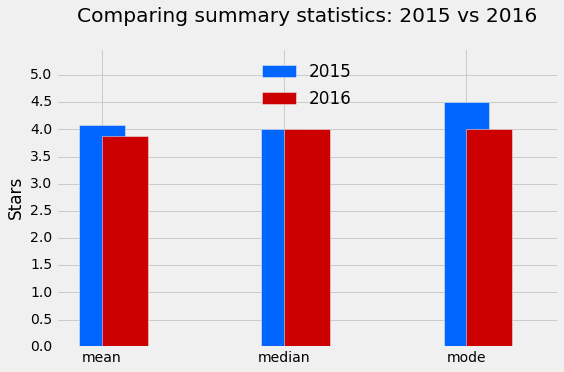

In [11]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Conclusion

The analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.